# Decision tree classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution.

## 1. Data acquisition

### 1.1. Load

In [3]:
import pandas as pd

# Load the data from the URL
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

### 1.2. Train-test split

In [4]:
from sklearn.model_selection import train_test_split

# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

## 2. EDA

### 2.1. Features

In [5]:
# Inspect the training features' data types
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


All of the features are already numeric - we don't need to do anything for the model to run. Let's check the labels too.

### 2.2. Labels

In [6]:
training_labels.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


In [16]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Check for / drop duplicates
print(f"Dimensions before dropping duplicates: {data_df.shape}")
data_df = data_df.drop_duplicates().reset_index(drop = True)
print(f"Dimensions after dropping duplicates: {data_df.shape}")

Dimensions before dropping duplicates: (768, 9)
Dimensions after dropping duplicates: (768, 9)


In [30]:
# Glucose
data_df[data_df["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [32]:
# Glucose
indices = [75, 182, 342, 349, 502]
for i in indices:
    data_df = data_df.drop(index=i)

data_df[data_df["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


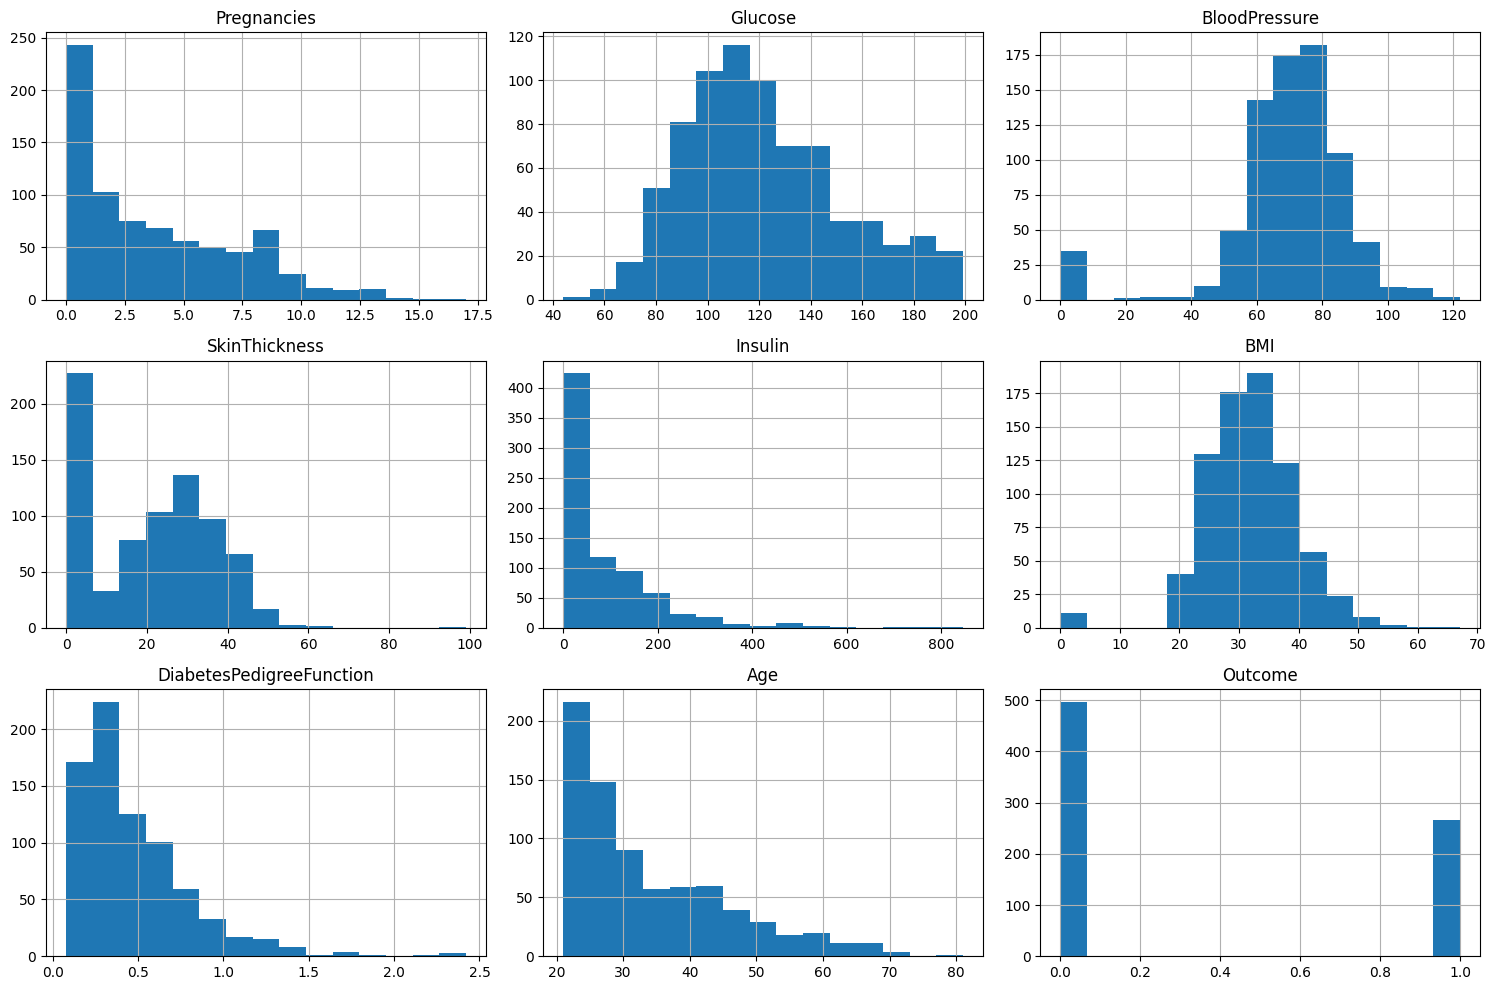

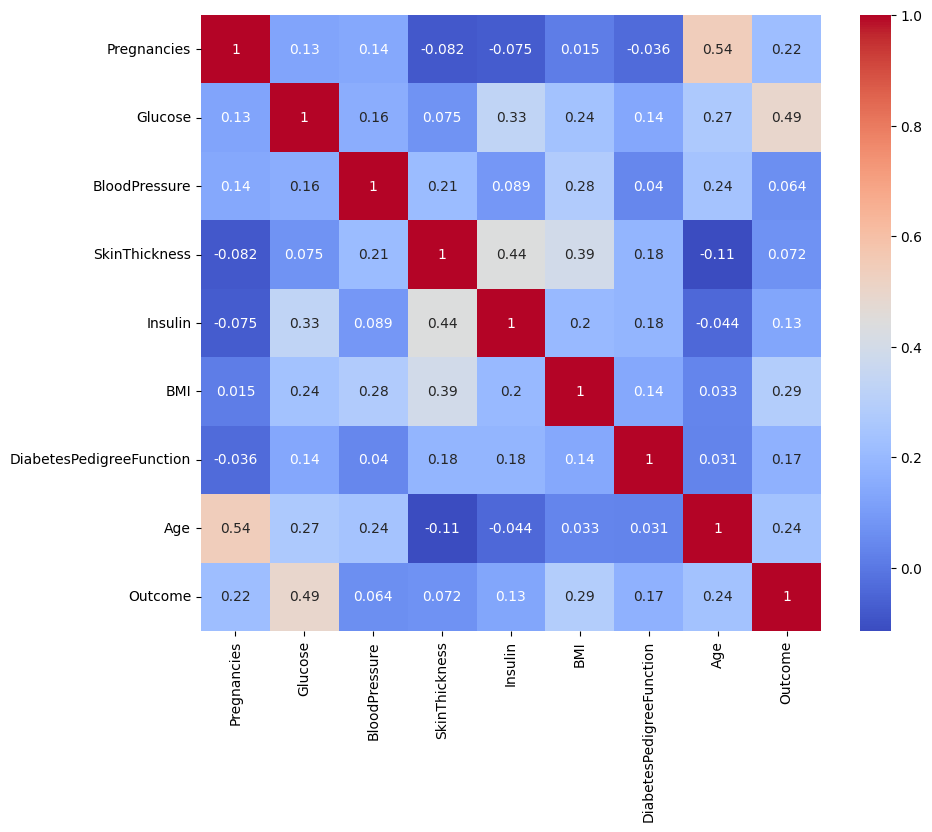

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
data_df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Also already numeric - we can move right to training the model and setting a baseline performance result.

## 3. Training

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train decision tree classifier
model=DecisionTreeClassifier(random_state=315)
fit_result=model.fit(training_features, training_labels)

## 4. Evaluation

In [9]:
from sklearn.metrics import accuracy_score

# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 74.7% accurate on the test data


Ok, done! Absolutely minimal decision tree classifier using ~10 statements. From here, there is **a lot** we can and should do to improve. But now we can do so incrementally, while maintaining a running state. We can also tell if anything we do 'works' in the performance sense by comparing to our baseline result of ~75% accuracy.

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a GridSearchCV object
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

# Train the model
grid.fit(training_features, training_labels)

# Get the best parameters
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [49]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 1, min_samples_split = 10, random_state = 42)
model.fit(training_features, training_labels)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [50]:
# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 75.3% accurate on the test data
